

-   **Name**: Sri Sai Harshavardhan Reddy Vippala
-   **Net ID**:ssv315

In this lab
-----------

The objective of this lab is to practice using the “recipe” for
exploratory data analysis:

1.  Learn about your data
2.  Import libraries
3.  Set up notebook settings
4.  Load data
5.  Check data
6.  Identify relationships in a pairplot
7.  Compute summary statistics for numerical variables
8.  Compute frequency tables for categorical variables
9.  Explore relationships between variables and potential issues

### Learn about your data

We will explore the [Brooklyn Bridge Automated Pedestrian Counts
dataset](https://www1.nyc.gov/html/dot/html/about/datafeeds.shtml#Pedestrians),
from the NYC Department of Transportation.

For context, you can imagine that we would like to use this dataset to
predict the volume of pedestrian traffic on the bridge in the future.

Review the documentation associated with the dataset:

-   [Metadata](https://www1.nyc.gov/html/dot/downloads/pdf/brooklyn-bridge-ped-count-readme.pdf)
-   [Summary
    report](https://www1.nyc.gov/html/dot/downloads/pdf/brooklyn-bridge-oct17-july18.pdf)
-   [Data
    dictionary](https://data.cityofnewyork.us/api/views/6fi9-q3ta/files/845905ea-21d4-4ec7-958a-a1a09214513d?download=true&filename=Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_data_dictionary.xlsx)

### Import libraries

We will only need a few libraries - `pandas` for handling data, and for
plotting, `matplotlib.pyplot` and `seaborn`.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Set up notebook settings

As in the in-class demo, we will also set up our notebook to

-   show plots “inline”
-   show output of all commands in a cell, not just the last one

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Read in data

Now that we have set everything up, we are ready to read in our data!

The data is provided in Excel format, which is not a “flat file” format
- so instead of reading it in using the `read_csv` function, we will use
the `read_excel` function.

The data will be read in as a `pandas` *data frame*, a tabular data
structure with labeled rows and columns.

In [0]:
url = 'https://www1.nyc.gov/html/dot/downloads/excel/brooklyn-bridge-automated-counts.xlsx'
df = pd.read_excel(url)

### Check data


In [0]:
df.head()


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN


You may notice that the `hour_beginning` variable is a `datetime`
including the full date and time in one field. For our analysis, it
would be more useful to have separate fields for the date, day of the
week, and hour.

We can create these additional fields by assigning the desired value to
them directly - then, observe the effect:

In [0]:
df['hour'] = df['hour_beginning'].dt.hour
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,hour,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,0,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,1,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,2,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,3,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,4,2017-10-01,Sunday


This is also a good time to look for rows that are missing data (“NA”
values), that may need to be cleaned.

We can see the number of NAs in each column by summing up all the
instances where the `isnull` function returns a True value:

In [0]:
df.isnull().sum()

hour_beginning          0
location                0
Pedestrians             0
Towards Manhattan       0
Towards Brooklyn        0
weather_summary         2
temperature             2
precipitation           2
lat                     0
long                    0
events               6744
hour                    0
date                    0
day_name                0
dtype: int64

There are two rows of data that are missing weather, temperature, and
precipitation data. We can see these rows with

In [0]:
df[df['temperature'].isnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,hour,date,day_name
3866,2018-03-11 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,2,2018-03-11,Sunday
5376,2018-05-13 00:00:00,Brooklyn Bridge,98,69,29,NaN,NaN,NaN,40.708164,-73.999509,Mother's Day,0,2018-05-13,Sunday


pandas includes routines to fill in missing data using the `fillna`
function
([reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)).
We will fill these using the “forward fill” method, which caries the
last valid observation forward to fill in NAs.

In [0]:
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


Now we can count the NAs again and find that there are only missing
values in the `events` column. This is the expected result, since there
are many days with no event.

In [0]:
df.isnull().sum()

hour_beginning          0
location                0
Pedestrians             0
Towards Manhattan       0
Towards Brooklyn        0
weather_summary         0
temperature             0
precipitation           0
lat                     0
long                    0
events               6744
hour                    0
date                    0
day_name                0
dtype: int64

### Create pairplot

The first rule of exploratory data analysis is “always look at the
data”, so we will do that now.

The next step in our recipe is to create a pairplot, which shows
pairwise plots between all numerical values.

We can create a “default” pairplot with

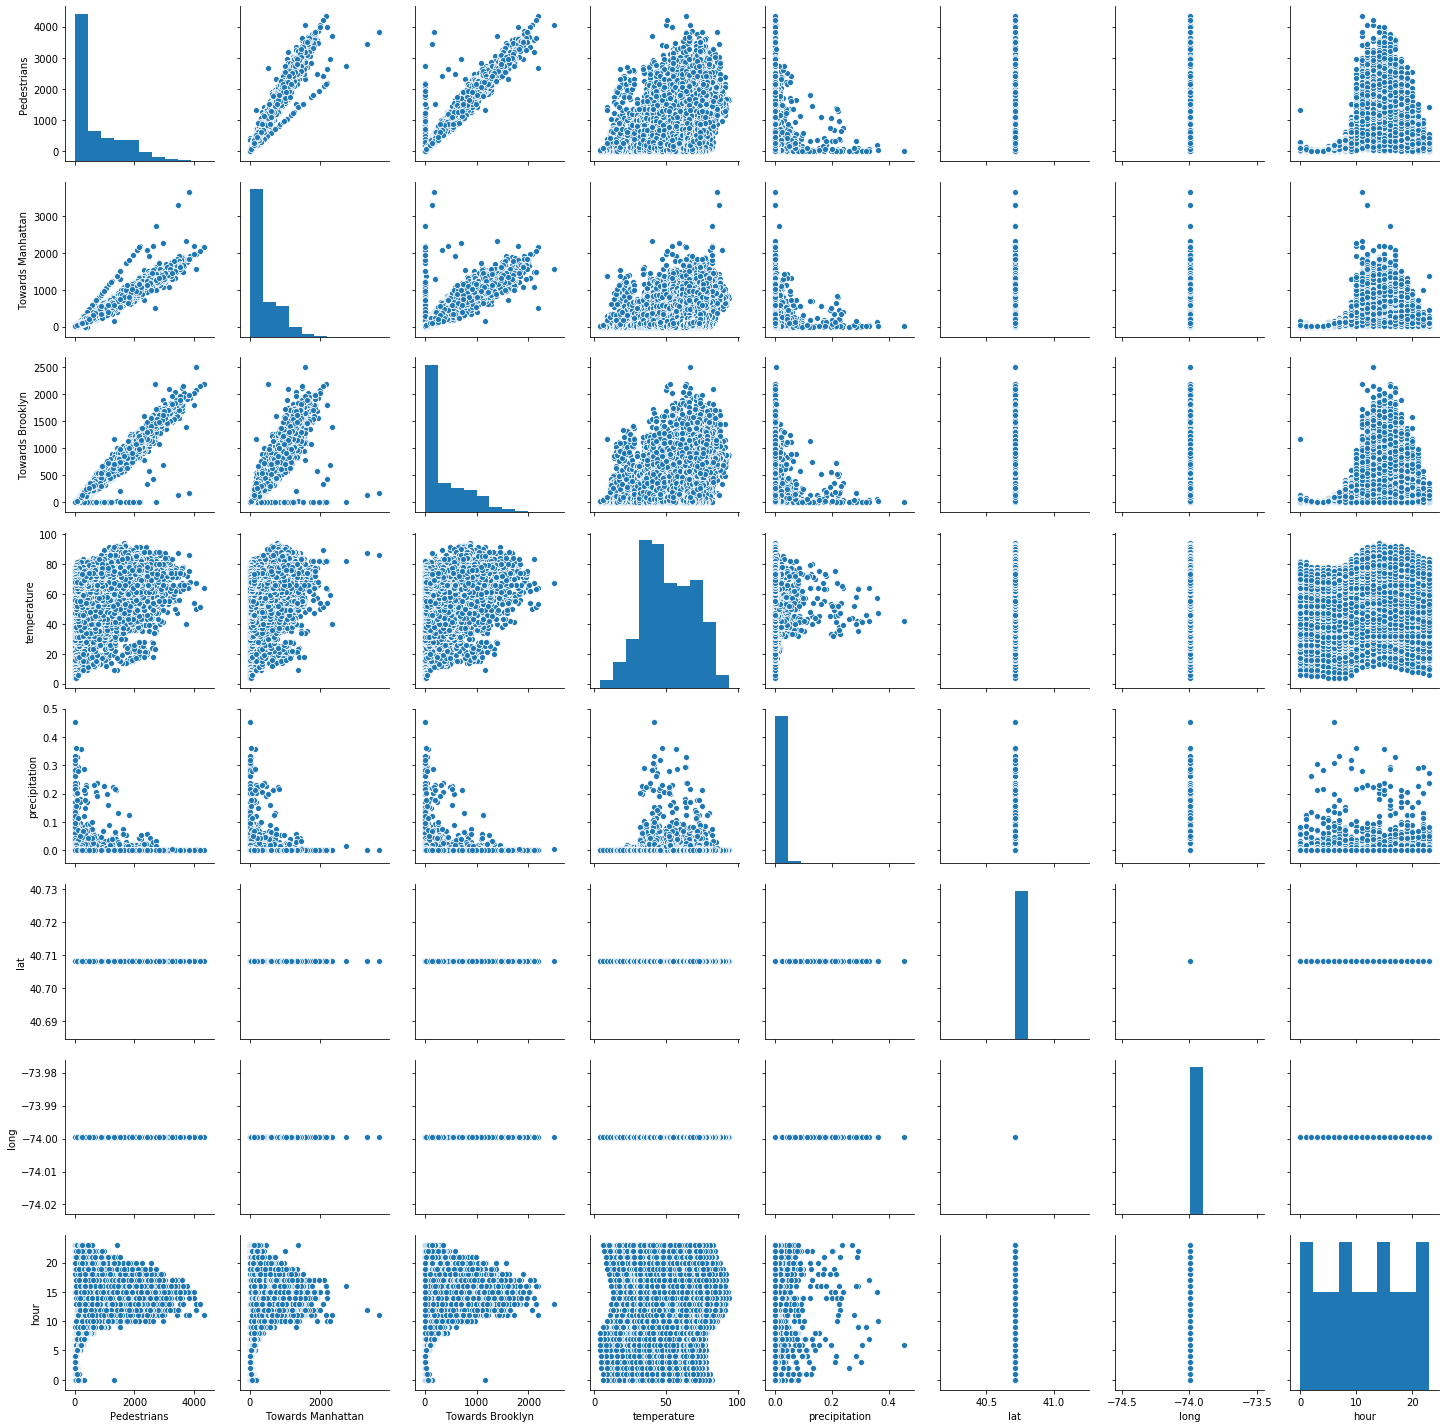

In [0]:
sns.pairplot(df)

But, it is difficult to see anything useful because there is so much
going on in this plot. We can improve things somewhata by:

-   specifying only the variables we want to include, and exluding
    variables that don’t contain useful information, such as `lat` and
    `long`, and
-   making the points on the plot smaller and partially transparent, to
    help with the overplotting.

We’ll also change the histograms on the diagonal, which show the
frequency of values for each variable, into a density plot which shows
the same information in a more useful format.

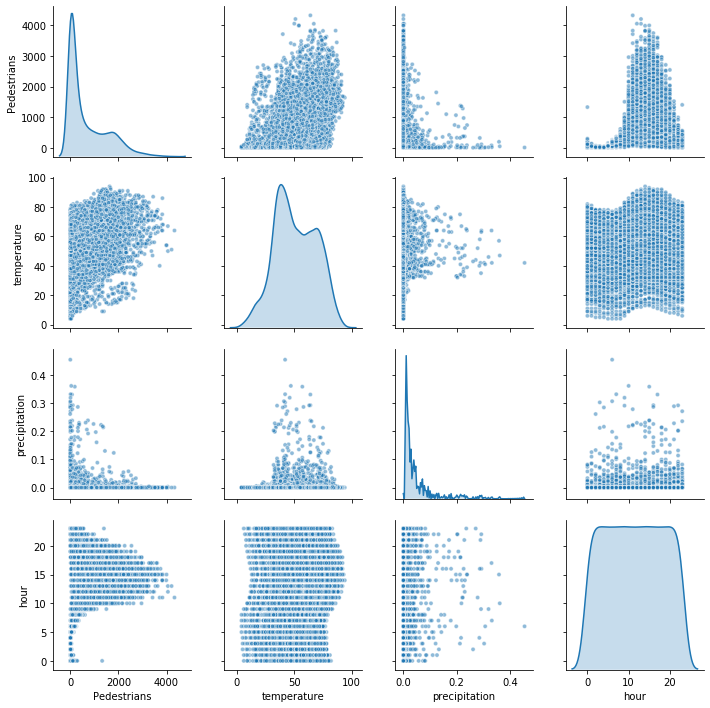

In [0]:
sns.pairplot(df, 
             vars=['Pedestrians', 'temperature', 'precipitation', 'hour'],
             diag_kind = 'kde',
             plot_kws={'alpha':0.5, 'size': 0.1})

We are mainly interested in the top row of the plot, which shows how the
target variable (`Pedestrians`) varies with the temperature,
precipitation levels, and hour. We will explore these relationships
further a little later on.

### Summary statistics - quantitative variables

To get summary statistics for all of the numeric variables, we can use
the `describe` function.

In [0]:
df.describe()

,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,hour
count,7296.000000,7296.000000,7296.000000,7296.000000,7296.000000,7.296000e+03,7.296000e+03,7296.000000
mean,688.280154,339.933799,348.242873,51.060444,0.004848,4.070816e+01,-7.399951e+01,11.500000
std,816.733976,406.004693,427.005013,17.934464,0.023748,4.903081e-12,5.428919e-12,6.922661
min,0.000000,0.000000,0.000000,4.000000,0.000000,4.070816e+01,-7.399951e+01,0.000000
25%,42.000000,22.000000,17.000000,37.000000,0.000000,4.070816e+01,-7.399951e+01,5.750000
50%,286.000000,145.000000,137.000000,49.000000,0.000000,4.070816e+01,-7.399951e+01,11.500000
75%,1208.000000,587.250000,603.250000,66.000000,0.000400,4.070816e+01,-7.399951e+01,17.250000
max,4330.000000,3657.000000,2495.000000,94.000000,0.454300,4.070816e+01,-7.399951e+01,23.000000


We are especially interested in `Pedestrians`, the target variable, so
we can describe that one separately:

In [0]:
df['Pedestrians'].describe()

count    7296.000000
mean      688.280154
std       816.733976
min         0.000000
25%        42.000000
50%       286.000000
75%      1208.000000
max      4330.000000
Name: Pedestrians, dtype: float64

### Summary statistics - categorical variables

For categorical variables, we can use `groupby` to get frequency and
other useful summary statistics.

For example, we may be interested in the summary statistics for
`Pedestrians` for different weather conditions:

In [0]:
df.groupby('weather_summary')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,1714.0,1390.186114,850.094454,39.0,657.75,1426.5,1960.75,4330.0
clear-night,1890.0,171.308466,262.816803,0.0,12.00,57.5,209.50,1779.0
cloudy,565.0,536.254867,696.362748,0.0,26.00,176.0,892.00,3657.0
fog,54.0,243.462963,300.742271,0.0,25.25,117.5,347.00,1321.0
partly-cloudy-day,1396.0,1229.182665,774.929206,33.0,575.50,1182.0,1812.00,3822.0
partly-cloudy-night,1295.0,132.549807,203.987284,0.0,9.00,43.0,165.00,1522.0
rain,313.0,307.252396,499.112035,0.0,18.00,87.0,370.00,2727.0
sleet,6.0,37.500000,41.258938,3.0,8.50,28.0,46.00,112.0
snow,55.0,176.709091,252.178925,2.0,33.00,94.0,176.00,1089.0


Make special note of the `count` column, which shows us the prevalence
of different weather conditions in this dataset. There are some weather
conditions for which we have very few examples.

Another categorical variable is `events`, which indicates whether the
day is a holiday, and which holiday. Holidays have very different
pedestrian traffic characteristics from other days.

In [0]:
df.groupby('events')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
Black Friday,24.0,833.333333,1004.443201,3.0,40.75,323.5,1515.50,2913.0
Christmas Day,24.0,783.166667,1035.393337,0.0,8.25,164.5,1329.25,2715.0
Christmas Eve,24.0,789.875000,998.888309,0.0,22.75,187.5,1377.50,2616.0
Cinco de Mayo,24.0,1295.041667,1279.526185,18.0,167.00,780.0,2554.00,3390.0
Columbus Day (regional holiday),24.0,374.375000,332.875850,6.0,74.50,273.0,724.50,888.0
Daylight Saving Time ends,24.0,428.000000,448.169902,5.0,65.00,193.0,888.25,1242.0
Daylight Saving Time starts,24.0,782.291667,867.909356,0.0,63.50,316.0,1684.25,2232.0
Easter Sunday,24.0,1201.250000,1294.661522,3.0,70.75,500.0,2377.50,3491.0
Father's Day,24.0,992.333333,805.807975,16.0,191.50,908.0,1851.50,2038.0


It can be useful to get the total pedestrian count for the day of a
holiday, rather than the summary statistics for the hour-long intervals.
We can use the `agg` function to compute key statistics, including
summing over all the samples in the group:

In [0]:
df.groupby('events').agg({'Pedestrians': 'sum'})


,Pedestrians
events,
Black Friday,20000
Christmas Day,18796
Christmas Eve,18957
Cinco de Mayo,31081
Columbus Day (regional holiday),8985
Daylight Saving Time ends,10272
Daylight Saving Time starts,18775
Easter Sunday,28830
Father's Day,23816


### Explore relationships

Finally, let’s further explore relationships between likely predictors
and our target variable. We can group by `day_name`, then call the
`describe` function on the `Pedestrians` column to see the effect of day
of the week on traffic volume:

In [0]:
df.groupby('day_name')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Friday,1032.0,678.181202,784.160754,0.0,43.00,284.0,1190.50,2913.0
Monday,1056.0,662.208333,753.569118,0.0,40.75,295.5,1244.25,3657.0
Saturday,1032.0,931.297481,1107.662402,0.0,51.00,358.5,1738.50,4330.0
Sunday,1056.0,746.046402,889.327898,0.0,43.00,276.0,1355.25,3716.0
Thursday,1032.0,625.565891,704.881730,0.0,42.00,290.0,1089.25,2945.0
Tuesday,1056.0,601.637311,675.518369,0.0,37.75,289.5,1086.25,2623.0
Wednesday,1032.0,574.302326,660.193756,0.0,40.00,255.0,1046.75,2727.0


Similarly, we can see the effect of temperature:

In [0]:
df.groupby('temperature')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
temperature,,,,,,,,
4.0,4.0,17.750000,17.250604,4.0,6.25,12.5,24.00,42.0
5.0,3.0,2.000000,2.645751,0.0,0.50,1.0,3.00,5.0
6.0,7.0,37.571429,40.385051,0.0,6.00,14.0,72.50,92.0
7.0,6.0,16.166667,16.265505,2.0,4.25,9.0,28.75,39.0
8.0,9.0,47.555556,64.025603,0.0,5.00,22.0,37.00,174.0
...,...,...,...,...,...,...,...,...
90.0,8.0,1633.625000,331.683127,1228.0,1426.75,1549.0,1906.75,2091.0
91.0,7.0,1731.000000,473.525079,1154.0,1409.00,1526.0,2112.00,2395.0
92.0,6.0,1474.833333,118.664934,1354.0,1390.75,1475.5,1492.75,1683.0


And the effect of precipitation:

In [0]:
df.groupby('precipitation')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
precipitation,,,,,,,,
0.0000,4836.0,721.442928,853.769182,0.0,42.00,286.0,1318.25,4210.0
0.0001,226.0,548.982301,652.851843,0.0,52.25,256.0,931.00,4330.0
0.0002,201.0,758.119403,838.964121,0.0,65.00,369.0,1380.00,3816.0
0.0003,121.0,692.264463,703.448408,0.0,73.00,460.0,1125.00,2517.0
0.0004,111.0,774.135135,785.861247,0.0,52.00,469.0,1270.00,2733.0
...,...,...,...,...,...,...,...,...
0.3305,1.0,76.000000,NaN,76.0,76.00,76.0,76.00,76.0
0.3316,1.0,17.000000,NaN,17.0,17.00,17.0,17.00,17.0
0.3584,1.0,193.000000,NaN,193.0,193.00,193.0,193.00,193.0


We can even plot it separately, by saving it in a new data frame and
plotting *that* data frame:

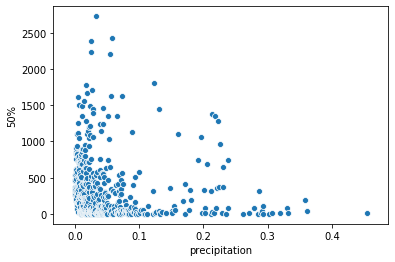

In [0]:
df_precip = df.groupby('precipitation')['Pedestrians'].describe()
df_precip = df_precip.reset_index()
sns.scatterplot(data=df_precip, x='precipitation', y='50%')

We see that certain weather conditions (very high temperature, heavy
precipitation, fog) are extremely underrepresented in the dataset. This
would be something to consider if, for example, we wanted to use this
dataset to predict the effect of extreme weather on pedestrian traffic.

For this data set, it is useful to validate our analysis by comparing
our computations to the official “Summary report” referenced above,
which reports the daily high temperature, total precipitation, and total
pedestrian count.



In [0]:
df.groupby('date').agg({'day_name': ['max'],'temperature': ['max'],'Pedestrians': [sum],'precipitation': ['sum']})


,day_name,temperature,Pedestrians,precipitation
,max,max,sum,sum
date,,,,
2017-10-01,Sunday,67.0,25687,0.0004
2017-10-02,Monday,71.0,18028,0.0000
2017-10-03,Tuesday,68.0,16580,0.0008
2017-10-04,Wednesday,74.0,17533,0.0002
2017-10-05,Thursday,81.0,17980,0.0374
...,...,...,...,...
2018-07-27,Friday,85.0,16944,0.5878
2018-07-28,Saturday,84.0,35242,0.0170
